In [1]:
import tensorflow as tf
from tensorflow import keras
from pmlb import fetch_data
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def grow_network_replace(model, config):
    new_model = keras.Sequential()
    input_shape = model.input_shape
    
    for i,l in enumerate(model.layers):
        old_width = l.output_shape[1]
        if i in config.keys():
#             new_model.add(keras.layers.Dense( old_width + config[i], activation='relu',
#                                            kernel_initializer=tf.keras.initializers.RandomNormal(
#                                                                     mean=0.0, stddev=0.005, seed=None),
#                                            bias_initializer=tf.keras.initializers.RandomNormal(
#                                                                     mean=0.0, stddev=0.005, seed=None),))
            new_model.add(keras.layers.Dense( old_width + config[i], activation='relu'))
        else:
            new_model.add(keras.layers.Dense( old_width, activation='relu'))
    
    new_model.build(input_shape)
    
    for i,l in enumerate(model.layers):
        old_width = l.output_shape[1]
        old_weights = l.get_weights()
        new_weights = new_model.layers[i].get_weights()

        new_weights[0][:old_weights[0].shape[0],:old_weights[0].shape[1]] = old_weights[0]
        new_weights[1][:old_weights[1].shape[0]] = old_weights[1]
        new_model.layers[i].set_weights(new_weights)
            
    del model

    return new_model

In [3]:
X, y = fetch_data('mnist', return_X_y=True)

In [51]:
input_dim = X.shape[1]

model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(keras.layers.Dense( 4, activation='relu'))
model.add(keras.layers.Dense( 4, activation='relu'))
model.add(keras.layers.Dense( 4, activation='relu'))
model.add(keras.layers.Dense( 10, activation='softmax'))

print(model.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 4)                 3140      
                                                                 
 dense_109 (Dense)           (None, 4)                 20        
                                                                 
 dense_110 (Dense)           (None, 4)                 20        
                                                                 
 dense_111 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
histories = []
configs = [{0:2,1:2,2:2},
           {0:2,1:2,2:2},
           {0:2,1:2,2:2},]

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
histories.append([model.evaluate(X,y)[0]] + model.fit(X,y,epochs=3).history['loss'])
print (histories)
for i,c in enumerate(configs):
    model = grow_network_replace(model,c)
    print(model.summary())
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    histories.append([model.evaluate(X,y)[0]] + model.fit(X,y,epochs=3).history['loss'])

2188/2188 [==============================] - 3s 1ms/step - loss: 51.8439 - accuracy: 0.0772
Epoch 1/3
2188/2188 [==============================] - 4s 2ms/step - loss: 2.1918 - accuracy: 0.1852
Epoch 2/3
2188/2188 [==============================] - 3s 2ms/step - loss: 2.0091 - accuracy: 0.2094
Epoch 3/3
2188/2188 [==============================] - 3s 2ms/step - loss: 1.9818 - accuracy: 0.2175
[[51.843894958496094, 2.1917569637298584, 2.0090556144714355, 1.981758713722229]]
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 6)                 4710      
                                                                 
 dense_113 (Dense)           (None, 6)                 42        
                                                                 
 dense_114 (Dense)           (None, 6)                 42        
                                      

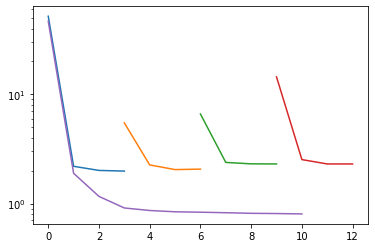

In [53]:
epochs = 0
for i,h in enumerate(histories):
    plt.plot(np.arange(len(h))+epochs,h)
    epochs += len(h)-1
    
plt.plot(np.arange(len(history)),history)
plt.yscale('log')

(array([ 4.,  2.,  8., 12., 14., 13., 13., 14., 15.,  5.]),
 array([-0.9375682 , -0.7678006 , -0.5980331 , -0.42826554, -0.258498  ,
        -0.08873045,  0.08103709,  0.25080463,  0.4205722 ,  0.5903397 ,
         0.7601073 ], dtype=float32),
 <BarContainer object of 10 artists>)

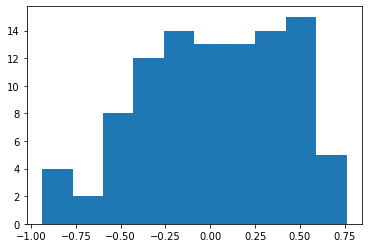

In [50]:
plt.hist(model.layers[1].get_weights()[0].reshape(-1))

In [43]:
input_dim = X.shape[1]

model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(keras.layers.Dense( 10, activation='relu'))
model.add(keras.layers.Dense( 10, activation='relu'))
model.add(keras.layers.Dense( 10, activation='relu'))
model.add(keras.layers.Dense( 10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = [model.evaluate(X,y)[0]] + model.fit(X,y,epochs=10).history['loss']

2188/2188 [==============================] - 2s 790us/step - loss: 46.7371 - accuracy: 0.0965
Epoch 1/10
2188/2188 [==============================] - 2s 935us/step - loss: 1.8912 - accuracy: 0.3301
Epoch 2/10
2188/2188 [==============================] - 2s 935us/step - loss: 1.1616 - accuracy: 0.5346
Epoch 3/10
2188/2188 [==============================] - 2s 949us/step - loss: 0.9104 - accuracy: 0.6579
Epoch 4/10
2188/2188 [==============================] - 2s 1ms/step - loss: 0.8631 - accuracy: 0.6774
Epoch 5/10
2188/2188 [==============================] - 2s 966us/step - loss: 0.8398 - accuracy: 0.6856
Epoch 6/10
2188/2188 [==============================] - 2s 972us/step - loss: 0.8327 - accuracy: 0.6878
Epoch 7/10
2188/2188 [==============================] - 2s 989us/step - loss: 0.8238 - accuracy: 0.6927
Epoch 8/10
2188/2188 [==============================] - 2s 1ms/step - loss: 0.8134 - accuracy: 0.6971
Epoch 9/10
2188/2188 [==============================] - 2s 1ms/step - loss: 0.

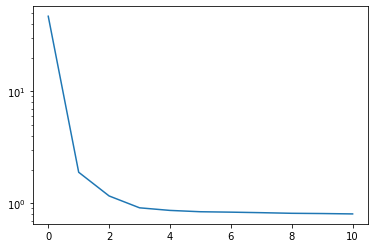

In [44]:
plt.plot(np.arange(len(history)),history)
plt.yscale('log')

(array([10.,  8.,  6., 12., 14., 12.,  8., 10., 10., 10.]),
 array([-0.5364622 , -0.4300101 , -0.32355803, -0.21710595, -0.11065388,
        -0.0042018 ,  0.10225028,  0.20870236,  0.31515443,  0.4216065 ,
         0.5280586 ], dtype=float32),
 <BarContainer object of 10 artists>)

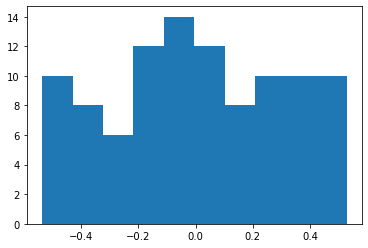

In [46]:
plt.hist(model.layers[1].get_weights()[0].reshape(-1))

In [23]:
# model.fit(X,y,epochs=5, validation_split=0.2, callbacks=keras.callbacks.EarlyStopping(
#                 monitor='val_loss',
#                 min_delta=0,
#                 patience=0,
#                 verbose=0,
#                 mode='auto',
#                 baseline=None,
#                 restore_best_weights=False
#             ))

(70000, 784)